<a href="https://colab.research.google.com/github/Tejaswimadastu/Machine_Learning/blob/main/Hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A media company publishes thousands of news articles daily.
Problems they face:
Articles are not consistently tagged
Manual categorization is expensive
New topics emerge frequently
The company wants to:
Automatically group similar news articles
Discover hidden themes without defining categories upfront
Build a content recommendation system
They hire you as a Data Analyst to discover natural article groupings using data — without knowing how many topics exist.

1️⃣ Data Understanding & Feature Selection

Load the dataset
Identify the column containing news text
Ignore any sentiment or category labels
Task:
Convert text into numerical form using TF-IDF
Limit features to a reasonable size (e.g., top 500–1000 words)

Dendrogram Construction & Analysis
Build a dendrogram using a subset of articles
Observe:
Where large vertical jumps occur
What they indicate about topic separation

Apply Hierarchical Clustering
Use Agglomerative Hierarchical Clustering
Choose an appropriate linkage method

Validation Without Labels (Critical Thinking)
Since this is unsupervised:
How do you judge clustering quality?
mertic:
Silhouette score


In [3]:
import pandas as pd
df=pd.read_csv('alldata.csv',encoding='latin1',header=None)
print(df.head())

          0                                                  1
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [4]:
df.columns = ['label', 'text']
texts = df['text'].astype(str)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=800, stop_words='english')
X = tfidf.fit_transform(texts)


In [7]:
print("TF-IDF Shape:", X.shape)

TF-IDF Shape: (4846, 800)


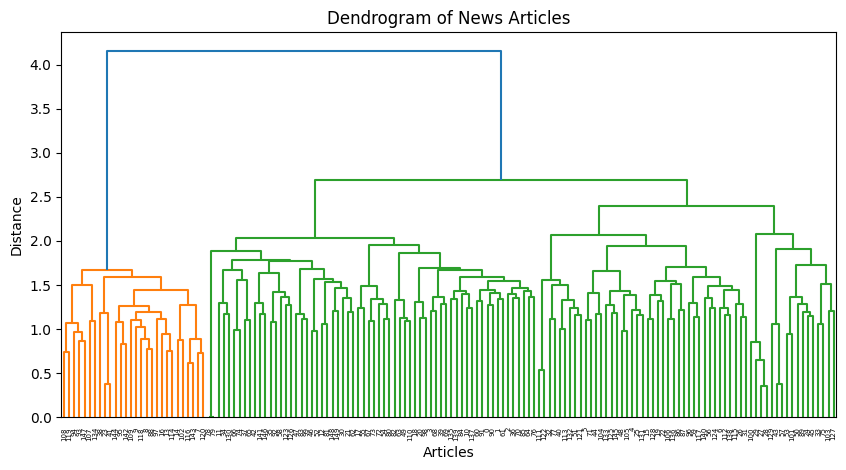

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Use subset for dendrogram
X_small = X[:150].toarray()

Z = linkage(X_small, method='ward')

plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title("Dendrogram of News Articles")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
            n_clusters=4,
            metric='euclidean',
            linkage='ward')

labels = model.fit_predict(X.toarray())

df['cluster'] = labels
print(df[['text','cluster']].head())


                                                text  cluster
0  According to Gran , the company has no plans t...        1
1  Technopolis plans to develop in stages an area...        1
2  The international electronic industry company ...        1
3  With the new production plant the company woul...        0
4  According to the company 's updated strategy f...        1


In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.010376233932945227


In [11]:
import numpy as np

terms = tfidf.get_feature_names_out()

for c in set(labels):
    idx = np.where(labels == c)
    mean_tfidf = X[idx].mean(axis=0)
    top = mean_tfidf.argsort()[0, -10:]

    print(f"\nCluster {c} keywords:")
    print([terms[i] for i in top])



Cluster 0 keywords:
[array([['services', 'group', 'share', 'market', 'business', 'finnish',
        'new', 'finland', 'said', 'company']], dtype=object)]

Cluster 1 keywords:
[array([['profit', 'value', '2010', '2009', 'quarter', 'year', 'sales',
        'net', 'eur', 'million']], dtype=object)]

Cluster 2 keywords:
[array([['sales', 'eur', 'finnish', 'oyj', '2006', '2007', 'profit',
        'net', 'euro', 'mln']], dtype=object)]

Cluster 3 keywords:
[array([['totalled', 'quarter', 'compared', 'loss', 'corresponding',
        'period', 'operating', 'profit', 'eur', 'mn']], dtype=object)]

Cluster 4 keywords:
[array([['net', 'sales', 'corresponding', 'respectively', 'profit',
        'operating', 'compared', 'increased', 'month', 'period']],
      dtype=object)]


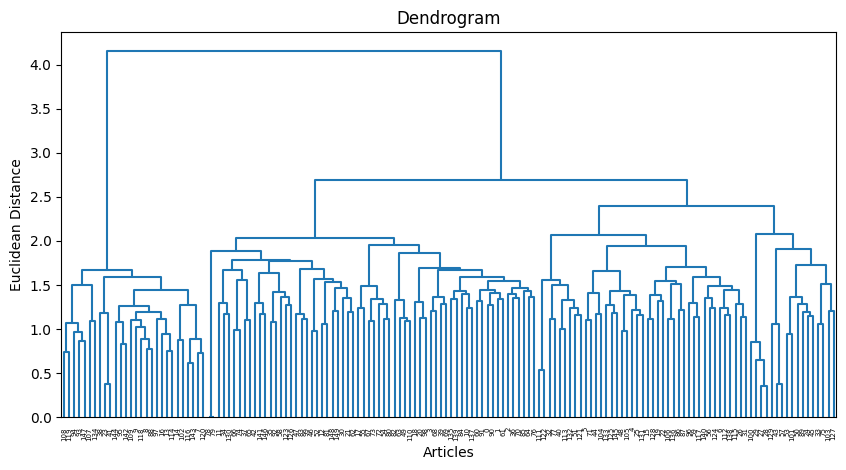

In [14]:
from scipy.cluster import hierarchy as sch
import matplotlib.pyplot as plt

# Convert sparse TF-IDF to array (use subset for speed)
X_small = X[:150].toarray()

plt.figure(figsize=(10,5))

sch.dendrogram(
    sch.linkage(X_small, method='ward'),
    color_threshold=0
)

plt.title("Dendrogram")
plt.xlabel("Articles")
plt.ylabel("Euclidean Distance")
plt.show()


In [15]:
model = AgglomerativeClustering(
        n_clusters=5,
        metric='euclidean',
        linkage='ward')

labels = model.fit_predict(X.toarray())
